In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7f39dc3d99c0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [74]:
file_all_gal = 'voting_with_coords.csv'
file_proc_gal = 'small_bar.csv'
import pandas as pd
df_all_gal = pd.read_csv('../data/{}'.format(file_all_gal), header=None)
df_proc_gal = pd.read_csv('../data/{}'.format(file_proc_gal), header=None)

In [75]:
import numpy as np
import os
import urllib
from astropy.io import fits as pyfits

In [76]:
def load_legacy_invvarmap(name_fold=None,name=None, ra=None, dec=None):
    if not os.path.isdir('../data/images/invvarmap/{}'.format(name_fold)):
        os.makedirs('../data/images/invvarmap/{}'.format(name_fold))
    if not os.path.isdir('../data/images/invvarmap/{}/{}'.format(name_fold,name)):
        os.makedirs('../data/images/invvarmap/{}/{}'.format(name_fold,name))
    output_image='../data/images/invvarmap/{}/{}/invvar.fits'.format(name_fold,name)
    
    try:
        url = ("http://legacysurvey.org/viewer/cutout.fits?ra={}&dec={}&layer=ls-dr9-north&subimage").format(ra, dec)
        urllib.request.urlretrieve(url,output_image)
    except Exception:
        url = ("http://legacysurvey.org/viewer/cutout.fits?ra={}&dec={}&layer=ls-dr9-south&subimage").format(ra, dec)
        urllib.request.urlretrieve(url,output_image)

def getind_gal(name_gal,df):
    for i in arange(1,df.shape[0]):
        if name_gal == df[0][i]:
            return i 
            break  
            
def draw_invvarmap(name_fold,name_gal):
    i = 2
    for band in ['g', 'r', 'z']:
        pathfits = '../data/images/invvarmap/{}/{}/invvar.fits'.format(name_fold,name_gal)
        pathpng = '../data/images/invvarmap/{}/{}/invvar_{}.png'.format(name_fold,name_gal,band)
        hdulist = pyfits.open(pathfits)
        img_header = hdulist[0].header
        img_data_raw = hdulist[i].data
        fig = plt.figure(figsize=[10,10])
        plt.subplot(111)
        plt.imshow(img_data_raw)#, vmin=0, vmax=0.3)
        plt.gca().invert_yaxis()
        plt.colorbar()
        plt.savefig(pathpng) 
        i += 2

/tmp/ipykernel_30946/3341324164.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=[10,10])


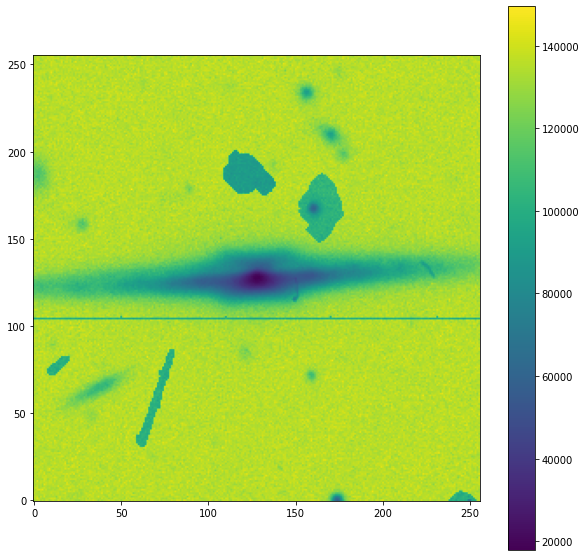

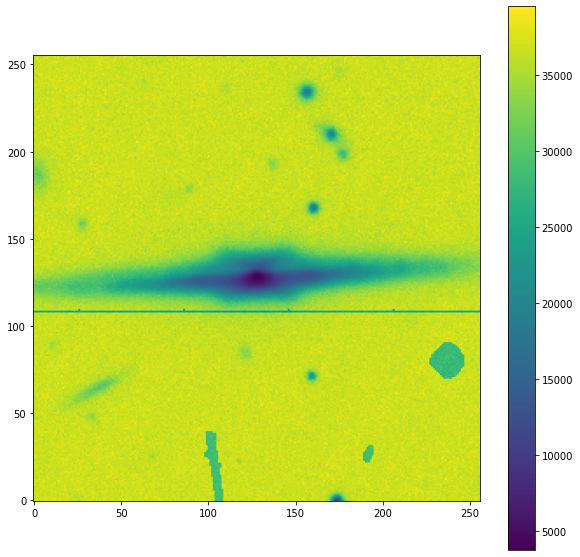

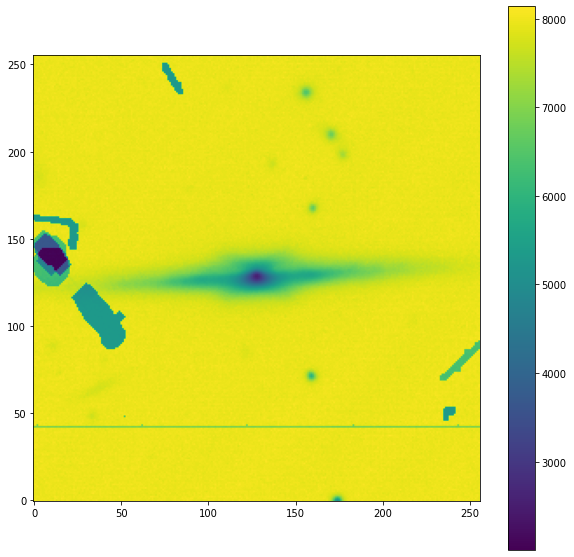

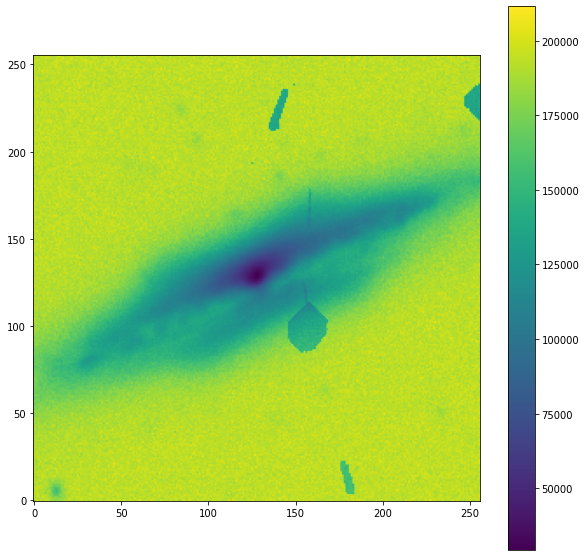

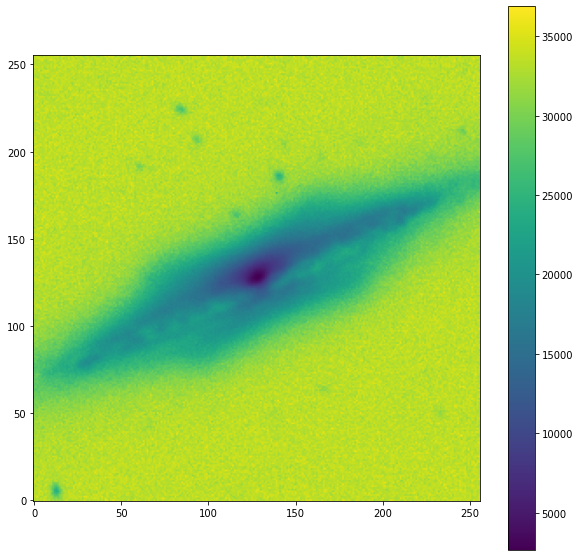

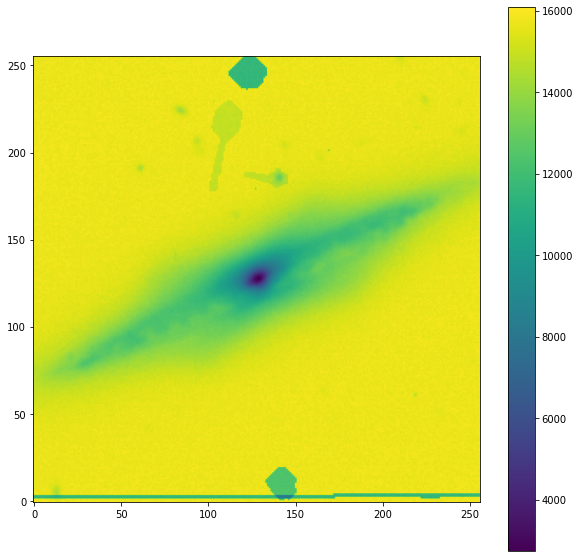

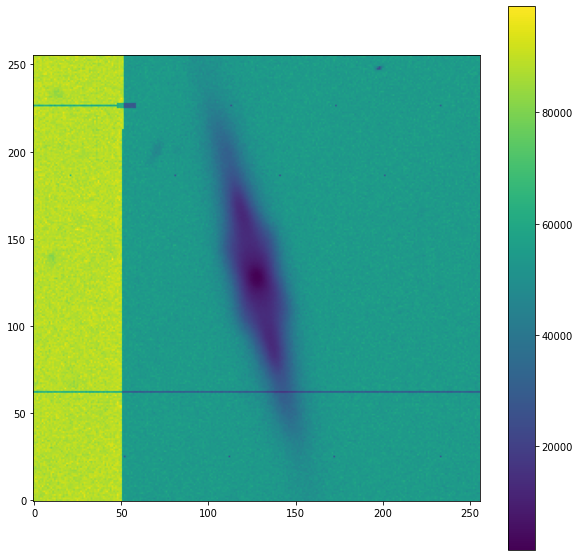

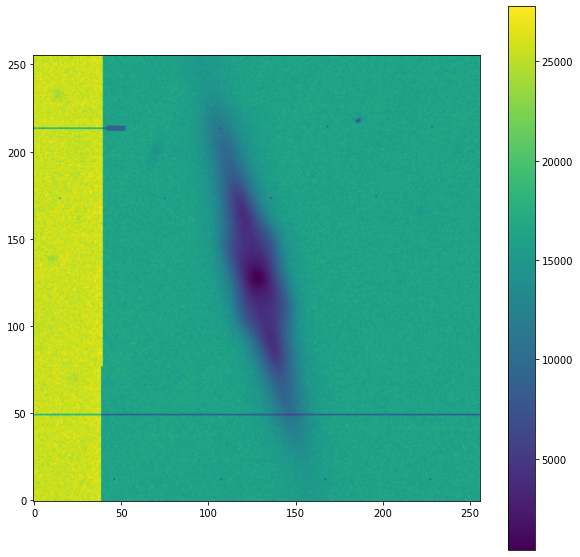

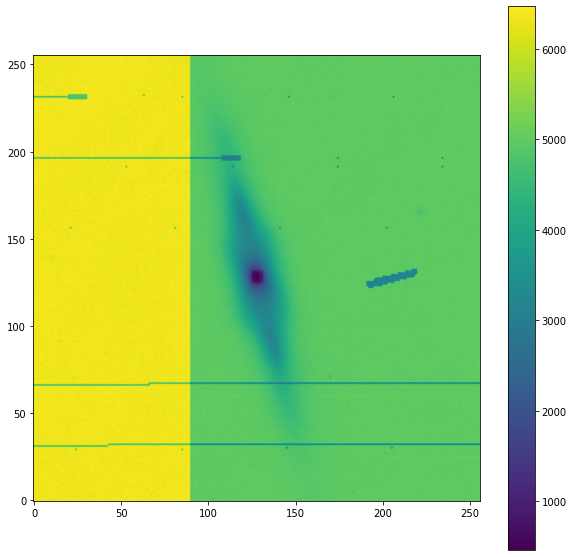

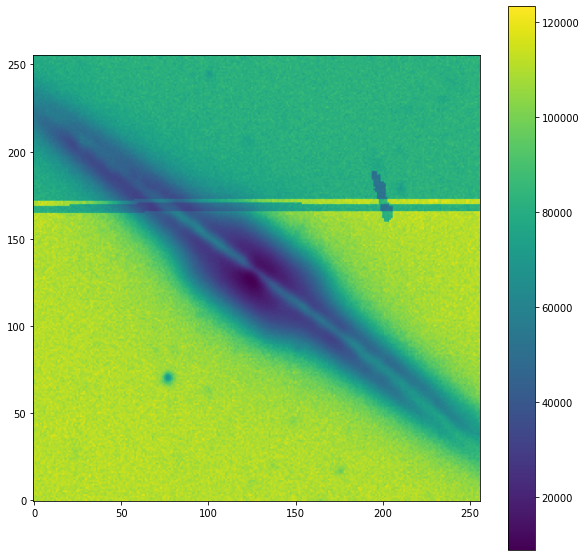

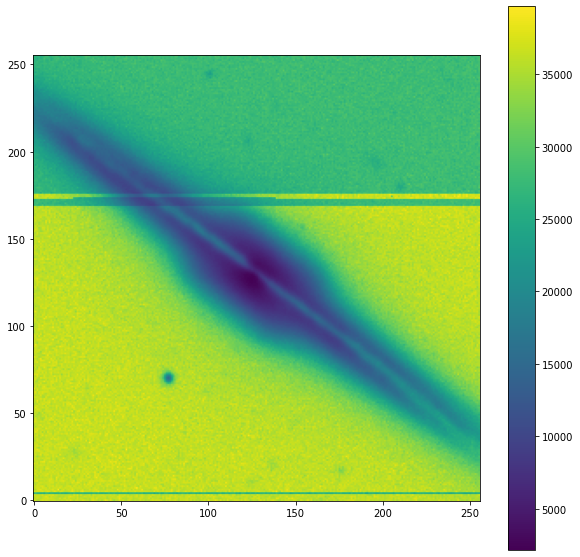

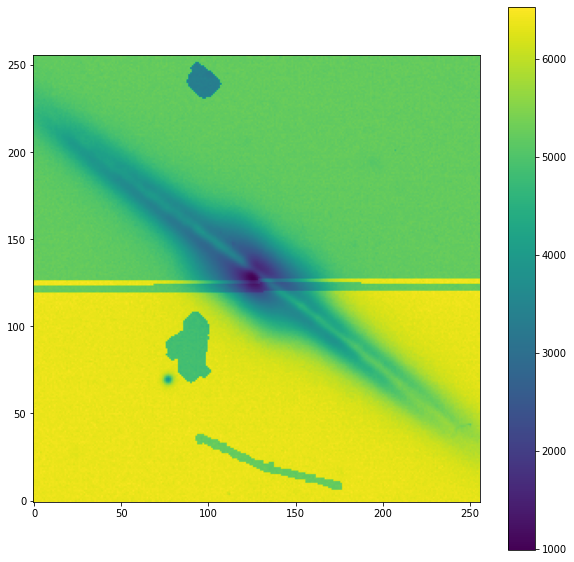

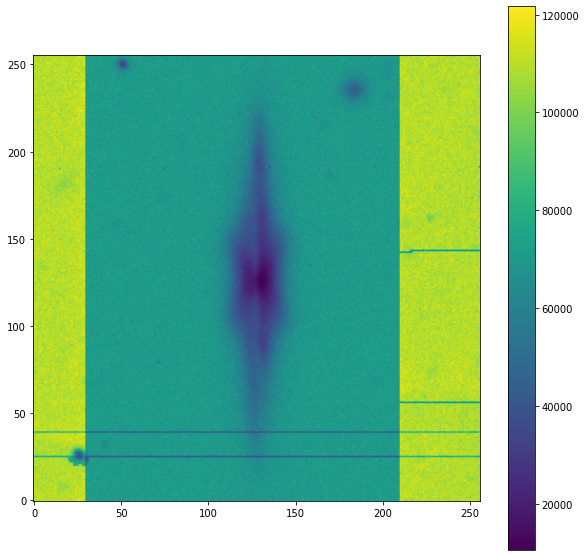

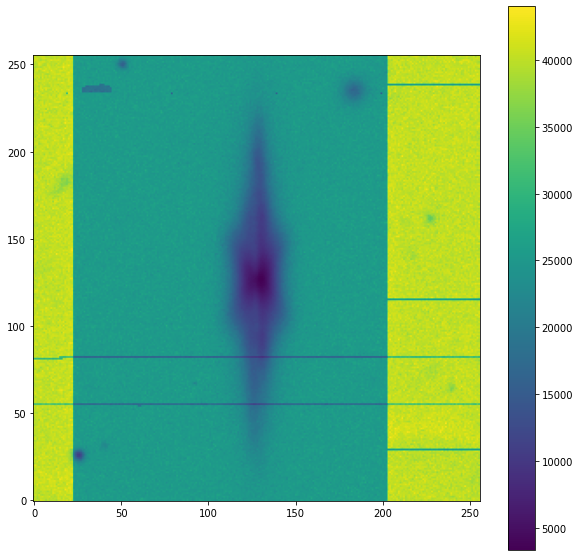

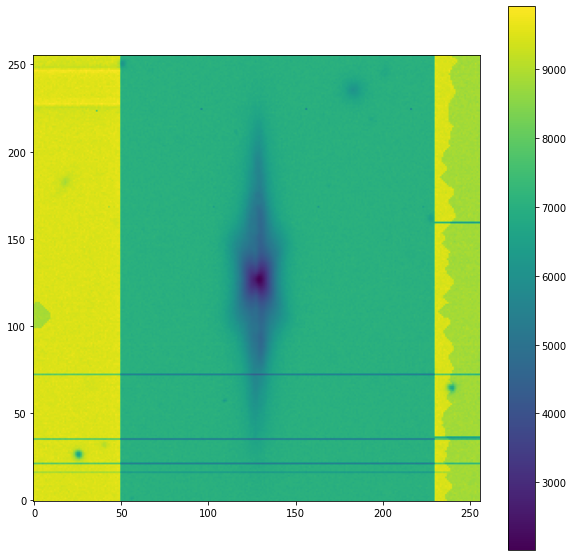

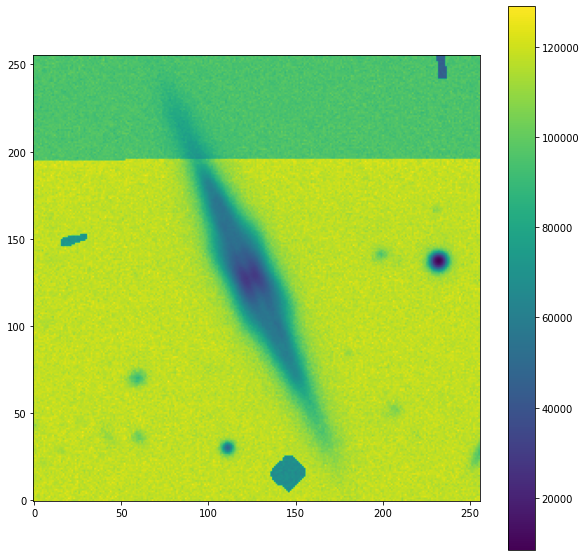

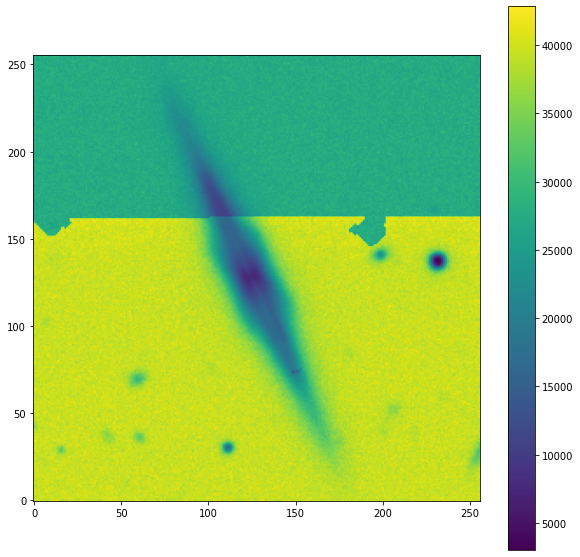

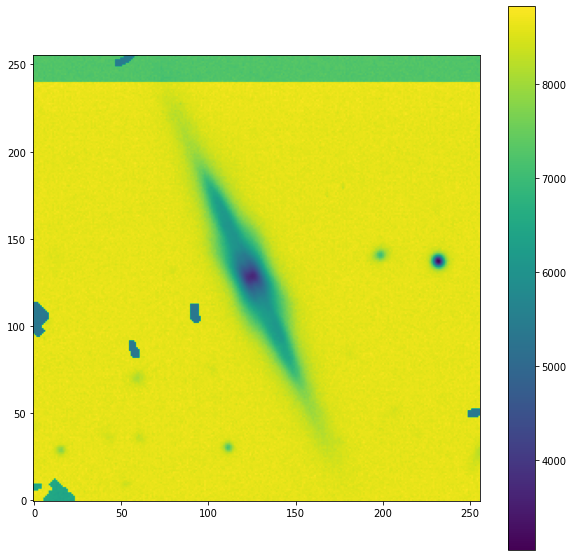

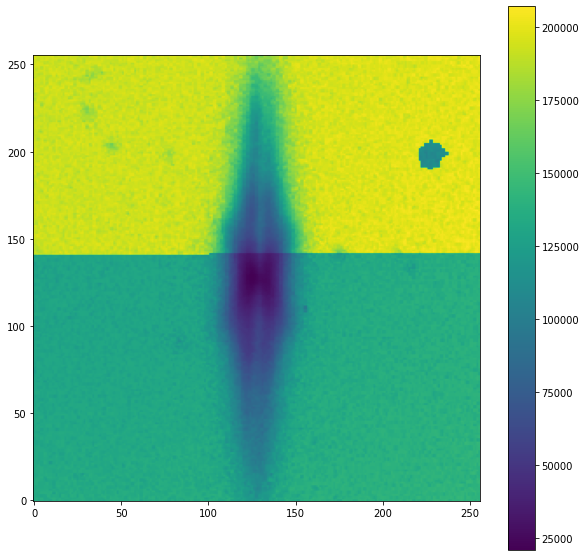

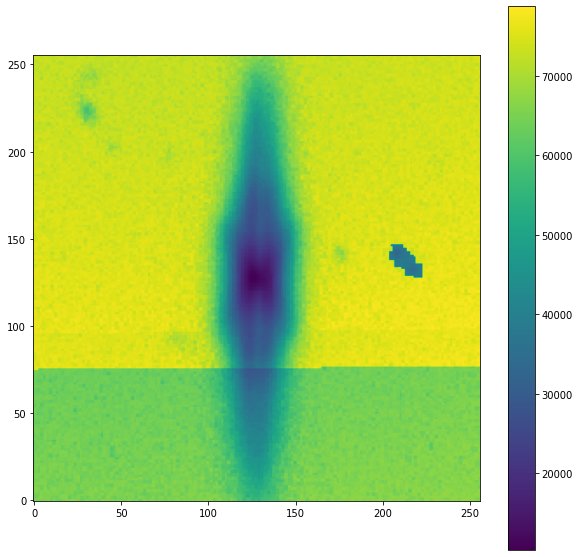

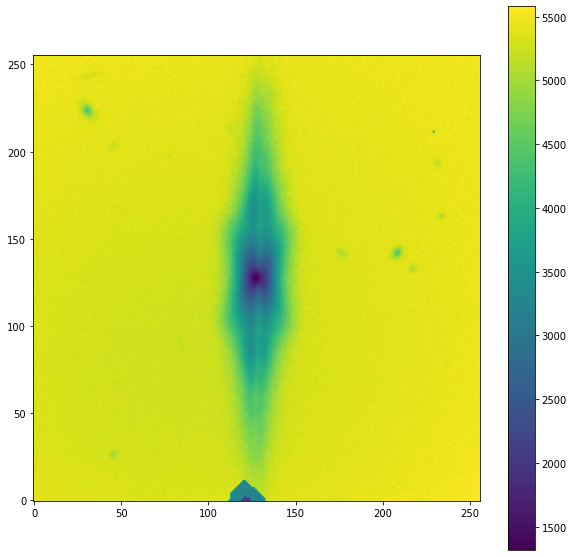

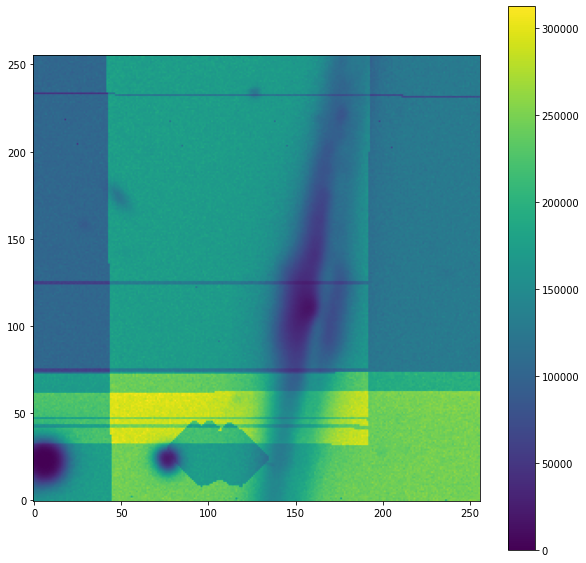

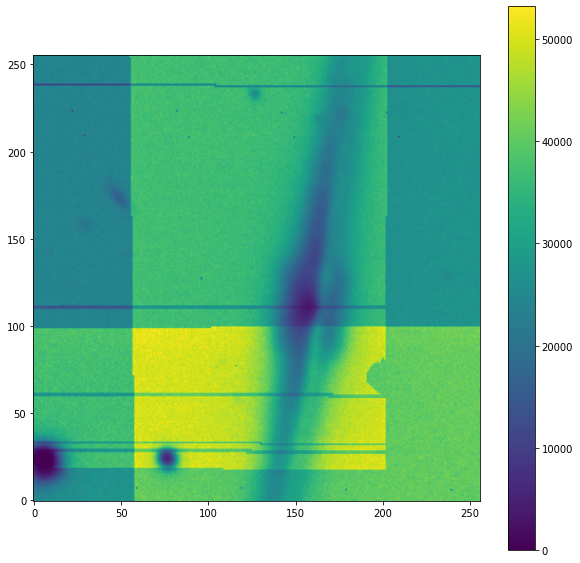

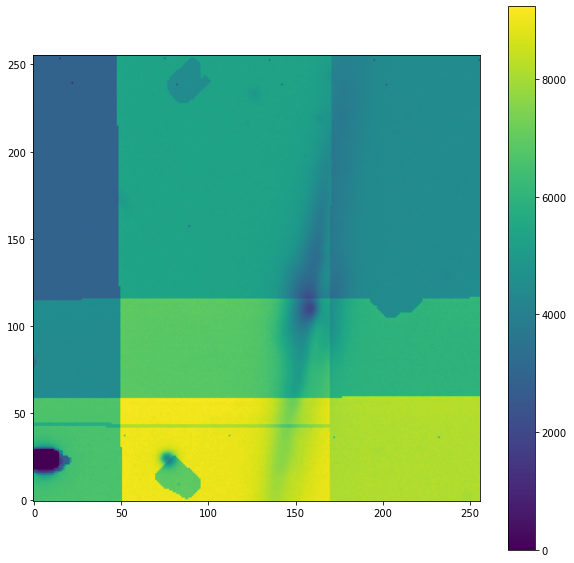

In [77]:
name_fold = file_proc_gal.replace('.csv',"")
for name_gal in df_proc_gal[0]:
    ind_gal = getind_gal(name_gal,df_all_gal)
    load_legacy_invvarmap(name_fold=name_fold,name=name_gal,ra=df_all_gal[1][ind_gal],
                    dec=df_all_gal[2][ind_gal])
    draw_invvarmap(name_fold=name_fold,name_gal=name_gal)